# Лаб 1
## РТ5-61Б Слкуни Герман

# 1) Текстовое описание
В качестве набора данных будем использовать топ 1000 популярных видео.
Датасет состоит из файла yt.csv

#### Файл содержит следующие данные:
- rank - место в топе
- Video - название видео
- Video views - число просмотров
- Likes - число лайков
- Dislikes - число дизлайков
- Category - категория видео
- published - дата публикации

### Подключение необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузим файл датасета в помощью библиотеки Pandas

In [2]:
data = pd.read_csv('yt.csv', sep=",")

# 2) Характеристики датасета

In [3]:
# Первые 5 строк
data.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


In [4]:
# Размер датасета (строки, колонки)
data.shape

(1000, 7)

In [5]:
# Список колонок с типами данных
data.dtypes

rank            int64
Video          object
Video views    object
Likes          object
Dislikes       object
Category       object
published       int64
dtype: object

In [6]:
# Число строк с дубликатами и пропусками
duplicatedCount = data.duplicated().sum()
misNum = data.isnull().sum()

print(f'Число дубликатов: {duplicatedCount}')
print(f'Число строк с пропуском:\n{misNum}')

Число дубликатов: 0
Число строк с пропуском:
rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64


In [7]:
data = data.dropna()

# Конвертация некоторых object в числовые представления
colsToChange = ['Video views', 'Likes', 'Dislikes']
for col in colsToChange:
    data[col] = data[col].str.replace(',', '').astype(int)

In [8]:
# Заполнение медианным
data1 = data.drop(["Video","Category"], axis = 1)
data1

,rank,Video views,Likes,Dislikes,published
0,1,54071677,3497955,78799,2019
5,6,76834495,804353,21195,2019
7,8,7396199,320910,6485,2020
9,10,7010732,1027392,34185,2020
10,11,96686,1007,82,2018
...,...,...,...,...,...
994,995,32695896,47735,1456,2007
995,996,847249,1857,173,2017
996,997,1001605,2214,27,2008
997,998,2718939,43492,0,2014


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [10]:
imputer.fit(data1)

SimpleImputer(strategy='median')

In [11]:
data_num = data1
data1 = pd.DataFrame(imputer.transform(data1), columns=data_num.columns)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         511 non-null    float64
 1   Video views  511 non-null    float64
 2   Likes        511 non-null    float64
 3   Dislikes     511 non-null    float64
 4   published    511 non-null    float64
dtypes: float64(5)
memory usage: 20.1 KB


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data1 = pd.DataFrame(scaler.fit_transform(data1), columns=data_num.columns)
data1

,rank,Video views,Likes,Dislikes,published
0,0.000000,0.691470,0.917979,0.442587,0.823529
1,0.005010,0.982804,0.211001,0.119045,0.823529
2,0.007014,0.094086,0.084114,0.036424,0.882353
3,0.009018,0.089153,0.269541,0.192005,0.882353
4,0.010020,0.000662,0.000151,0.000461,0.764706
...,...,...,...,...,...
506,0.995992,0.417889,0.012415,0.008178,0.117647
507,0.996994,0.010268,0.000374,0.000972,0.705882
508,0.997996,0.012244,0.000467,0.000152,0.176471
509,0.998998,0.034224,0.011302,0.000000,0.529412


In [13]:
data_cat = data["Category"]
data_cat

0                 Music
5                 Music
7                 Music
9                 Music
10        Entertainment
             ...       
994               Music
995      People & Blogs
996    Autos & Vehicles
997       Entertainment
998              Gaming
Name: Category, Length: 511, dtype: object

In [14]:
data_cat_encoded, data_categories = data_cat.factorize()
data_cat_encoded[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 4, 0],
      dtype=int64)

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
data_cat_1hot = encoder.fit_transform(data_cat_encoded.reshape(-1, 1))
data_cat_1hot=data_cat_1hot.toarray()
data_cat_1hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
data2 = pd.DataFrame(data_cat_1hot)
data3 = data1
data3['Category'] = pd.Series(list(data_cat_1hot))
data3

,rank,Video views,Likes,Dislikes,published,Category
0,0.000000,0.691470,0.917979,0.442587,0.823529,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0.005010,0.982804,0.211001,0.119045,0.823529,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0.007014,0.094086,0.084114,0.036424,0.882353,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0.009018,0.089153,0.269541,0.192005,0.882353,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0.010020,0.000662,0.000151,0.000461,0.764706,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
506,0.995992,0.417889,0.012415,0.008178,0.117647,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
507,0.996994,0.010268,0.000374,0.000972,0.705882,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
508,0.997996,0.012244,0.000467,0.000152,0.176471,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
509,0.998998,0.034224,0.011302,0.000000,0.529412,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [17]:
data3['Video'] = data['Video']
data3.dropna()

,rank,Video views,Likes,Dislikes,published,Category,Video
0,0.000000,0.691470,0.917979,0.442587,0.823529,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Lil Nas X - Old Town Road (Official Movie) ft....
5,0.011022,0.074315,0.040711,0.019681,0.823529,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",JP Saxe - If the World Was Ending (Official Vi...
7,0.014028,0.048638,0.032092,0.007330,0.882353,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","Polo G, Stunna 4 Vegas & NLE Choppa feat. Mike..."
9,0.021042,0.020898,0.055276,0.042569,0.941176,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",JD Pantoja - 12•19 (Official Video)
10,0.022044,0.033888,0.026128,0.013441,0.882353,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Power Star Pawan Kalyan Special Surprise To Se...
...,...,...,...,...,...,...,...
501,0.982966,0.019974,0.000158,0.000292,0.117647,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Lil Tjay - Hold On (Official Video)
505,0.987976,0.003581,0.001318,0.000764,0.705882,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Богатеи на Порше на митинге вкладчиков ТФБ
506,0.995992,0.417889,0.012415,0.008178,0.117647,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Vor dem Spiel Arminia vs Eintracht
507,0.996994,0.010268,0.000374,0.000972,0.705882,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Horse attacks alligator! Payne's prairie 4/12/17


In [18]:
# Основные статистические характеристки набора данных
data.describe().style.format('{:.2f}')

,rank,Video views,Likes,Dislikes,published
count,511.00,511.00,511.00,511.00,511.00
mean,534.34,4645749.14,60098.89,2346.77,2015.06
std,274.80,9608342.98,250820.44,9798.93,4.39
min,1.00,44939.00,433.00,0.00,2005.00
25%,312.00,849634.50,5431.00,198.50,2012.00
50%,540.00,1680831.00,12906.00,465.00,2017.00
75%,765.50,3500446.50,40431.00,1451.00,2017.50
max,999.00,78178105.00,3810456.00,178042.00,2022.00


# 3) Визуальное исследование датасета

### Популярность видео по годам

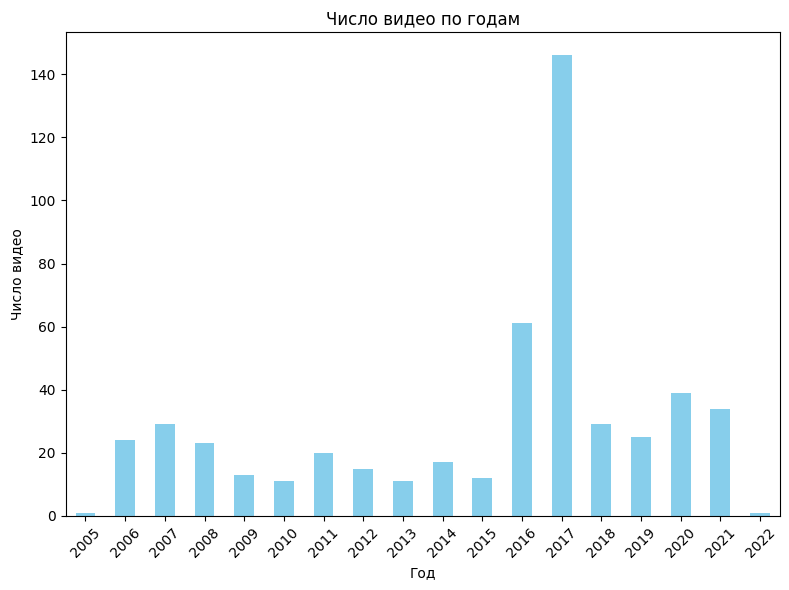

In [19]:
# Группировка по годам и подсчет количества видео
videoYearCount = data.groupby('published').size()

# Создание столбчатой диаграммы с помощью pandas
videoYearCount.plot(x='Year', y='Count', kind='bar', figsize=(8, 6), color='skyblue')

# Настройка меток и заголовка (по желанию)
plt.xlabel("Год")
plt.ylabel("Число видео")
plt.title("Число видео по годам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

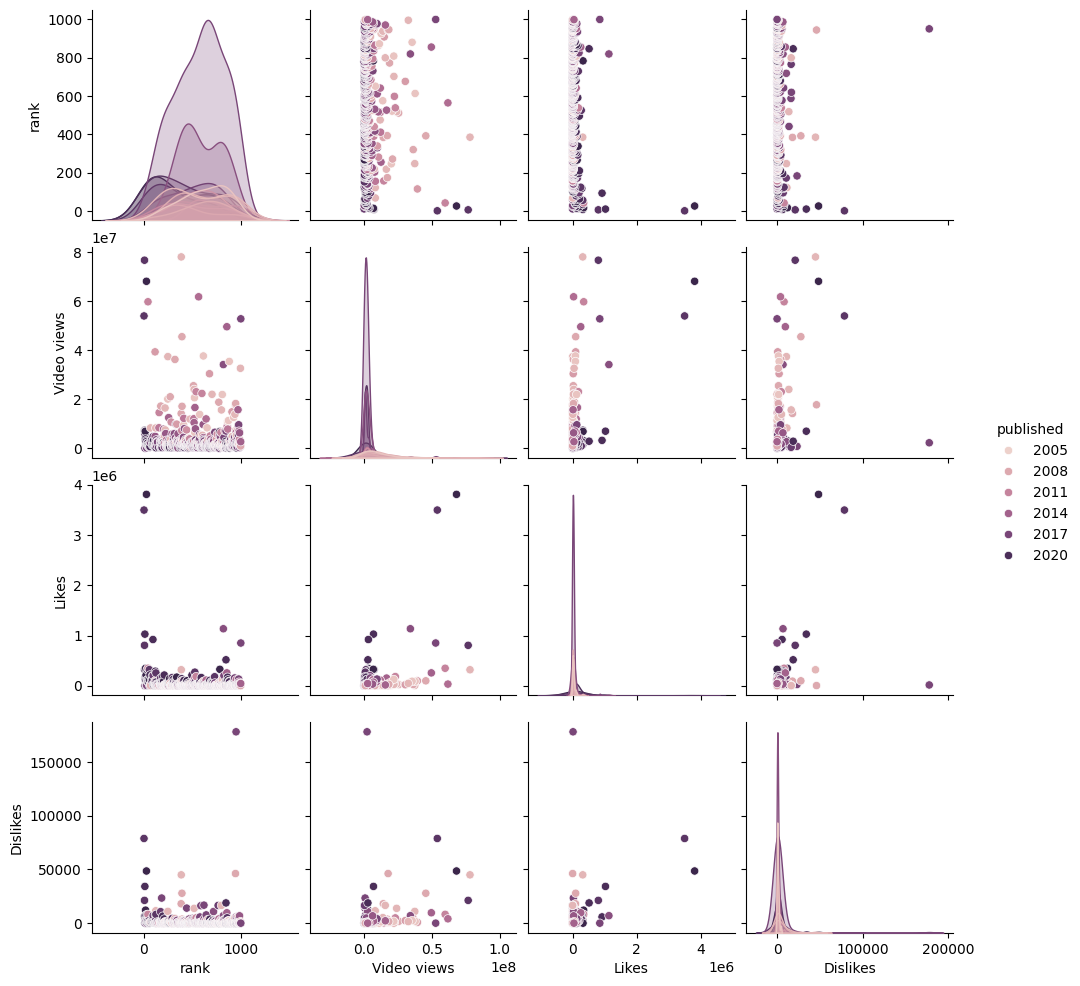

In [21]:
sns.pairplot(data, hue='published')

# 4) Информация о корреляции

In [22]:
# Создание нового датасета без строковых данных
dataCor = data.copy()
dataCor.drop('Video', axis=1, inplace=True)
dataCor.drop('Category', axis=1, inplace=True)

# Корреляция
dataCor.corr()


,rank,Video views,Likes,Dislikes,published
rank,1.000000,-0.061399,-0.179339,-0.028474,-0.183478
Video views,-0.061399,1.000000,0.494187,0.320324,-0.297321
Likes,-0.179339,0.494187,1.000000,0.424481,0.154623
Dislikes,-0.028474,0.320324,0.424481,1.000000,0.013831
published,-0.183478,-0.297321,0.154623,0.013831,1.000000


<Axes: >

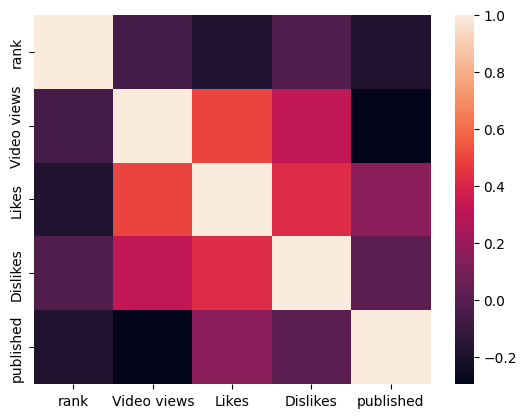

In [23]:
# Визуализация корреляции
sns.heatmap(dataCor.corr())